# Lesson 3 Assignment - Monty Hall Simulation
## Author - Matthew Denko

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

## Monty Hall Problem
    
    The Monty Hall probem comes from a television game show, "Let's Make a Deal", in which contestants would be given the option to choose 3 doors ("A","B","C") and behind one of the doors is a Car and behind the other two doors is a Goat. After the cotestant chooses a door, the host would then reveal that one of the other two options was incorrect. The host would then give the contestant the option to stick with their choice or to switch.

In [120]:
# Import libraries

import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from time import time as TT
from random import choice as ch
import numpy as np

### Comparison of Strategies: 
    I will now compare the proabilities of winning using the two different strategies. The first strategy is when the contestant switches from their original selection. The second strategy is when the contestant sticks with their original selection.

In [121]:
# Probability of Winning - Switching

#Probability(win car with switch | picked goat initially)
P1 = 1 * (2/3)
print("Probability you win the car with switching given you picked the goat initially is", P1)

#Probability(win car with switch | picked car initially)
P2 = 0 * (1/3)
print("Probability you win the car with switching given you picked the car initially is", P2)
 
#Total Probability of Switching
Total_Probability = P1 + P2
print("Total probability you win the car given you switch is", Total_Probability)

Probability you win the car with switching given you picked the goat initially is 0.6666666666666666
Probability you win the car with switching given you picked the car initially is 0.0
Total probability you win the car given you switch is 0.6666666666666666


#### Comments:

    The total probability that you win the car given you switch from your inital choice is the combination of the probability of two independent events. The first is the probability that you win the car with switching given you picked the goat initially is 2/3. This is because, when your choose your first selection this choice is completely random and each option has probability of being a car equal to 1/3. When one of the options is removed if you decide to switch choices you now have a probability of 2/3 of that option being the car given that your second choice you know one of the 3 options is the goat. The second is the probability that you win the car with switching given you picked the car intially is 0. This is because you cannot win if you picked the car initially and switch away from it. The total combination of these probabilities is 2/3 which means you have a probability of winning if you switch of 2/3.
    

In [122]:
# Simulate Not Switching

#Probability (win car no switch | picked goat initially)
P1 = 0 * (2/3)
print("Probability you win the car without switching given you picked the goat initially is", P2)

#Probability (win car no switch | picked car initially)
P2 = 1 * (1/3)
print("Probability you win the car without switching given you picked the car initially is", P2)

#Total Probability of Not Switching
Total_Probability = P1 + P2
print("Total probability you win the car given you do not switch is", Total_Probability)

Probability you win the car without switching given you picked the goat initially is 0.0
Probability you win the car without switching given you picked the car initially is 0.3333333333333333
Total probability you win the car given you do not switch is 0.3333333333333333


#### Comments:
    
    The total probability you win the car given you do not switch from your inital choice is the combination of the probability of two independent events. The first is the probability that you win the car without switching given you pick the goat initially which is 0. The second is the probability you win the car with no switch given you picked the car initially which is 1/3. The toal combination of these proabilities is 1/3 which means you have a 1/3 option of choosing the car initially and that choice being correct. This is lower than the probability of winning while switching because in that case you have a 2/3 probability of your intial choice being a goat. 

### Simulating Strategies: 

#### Comments:
    
    Below I will be running a simulation for 10,000 events of the Monty Hall problem where the constestant switches from their original choice. The results will be a aggregated probability of winning after n amount of occurences. For example, n = 33 will represent the proportion of choosing the car correctly in the first 33 choices given the contestant switches each time.

In [123]:
# Running Simulation

ac = []
tc = []
N = []
st = TT()
for M in range(1,10000): #Outer loop from 1 to 10000
    st1 = TT()
    score = []
    runs = 0
    cards = [1,2,3]
    for K in range(1,M): # sub loop that simulates 1 to M(outerloop) games
        aset = []
        host = cards.copy()
        hbk = ch(host) #Randomly choose as answer which host knows
        aset.append(hbk)
        #print("The host knows the answer",hbk)
        player = cards.copy()
        px = ch(player) # Contestanrs random guess
        aset.append(px)
        #print ("Players first choice",px)
        chance = 0
        for i in host: # The computation....host will eliminate P(X|DOOR) = 0
            if i not in aset:
                chance = i
        #print ("The elimination",chance)
        #print (player)
        player.pop(player.index(chance))
        player.pop(player.index(px))
        #print ("final answe",player)
        if player[0] == hbk:
            score.append(1)
        else:
            score.append(0)
        runs = K
        #print ("\n\n")
    ac.append(np.mean(score))
    N.append(M)
    en1 = TT()
    tc.append(en1-st1)
en = TT()    
print ("Total time for Loop  ", en - st )

/Users/matt.denko/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/matt.denko/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Total time for Loop   169.14246916770935


### Graphical Analysis:
    Histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching

In [124]:
#Creating Dataframe and calculating summary statistics - For Switching

switch_df = pd.DataFrame()
switch_df.loc[:,'probabilities'] = ac
switch_df = ac_df.drop(0)
switch_df.head(10)
switch_df.describe()

,probabilities
count,9998.000000
mean,0.666910
std,0.013584
min,0.444444
25%,0.661813
50%,0.666667
75%,0.671733
max,1.000000


#### Comments:
    
    After removing null values there are 9998 events. After 9998 events the mean cumulative probability of winning if you do switch is ~0.67.

In [125]:
#Creating Dataframe and calculating summary statistics - For Staying

stay_df = 1-switch_df
stay_df.head(10)
stay_df.describe()

,probabilities
count,9998.000000
mean,0.333090
std,0.013584
min,0.000000
25%,0.328267
50%,0.333333
75%,0.338187
max,0.555556


#### Comments:
    
    After removing null values there are 9998 events. After 9998 events the mean cumulative probability of winning if you do not switch is ~0.33.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b411f28>]],
      dtype=object)

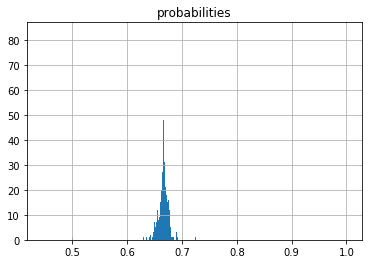

In [126]:
#Histogram - Switching

switch_df.hist(bins = 10000)

#### Comments:
    
    The distribution appears to be mostly normal with a few potential high outliers (likely some of the early events).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1304d0c18>]],
      dtype=object)

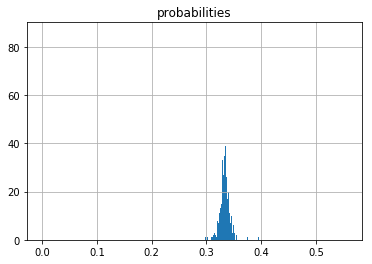

In [127]:
#Histogram - Staying

stay_df.hist(bins = 10000)

#### Comments:
    
    The distribution appears to be mostly normal with a few potential high outliers.

## Recomended Strategy

    After comparing the probabilities and simulating them over 10,000 events and looking at their distributions it is clear that the best strategy is to always switch. I recommend to any contestant to always switch from their original choice when given the option.